**<h1><center>Trabajo 1: Optimización heurística<h1><center>**

---

<center><img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" width="300"></center>

---

**<h1><center> Redes neuronales y algoritmos bioinspirados </center></h1>**

**<h1><center> 2024-2S </center></h1>**

---

**<h2><center> Equipo 10<h2><center>**

**<h6><center> Carolina Álvarez Murillo<h6><center>**
**<h6><center>  Alejandro Giraldo Sarria<h6><center>**
**<h6><center>   Alejandro Orozco Ochoa<h6><center>**
**<h6><center>   Juan Jose Zapata Cadavid<h6><center>**

# Función Rastrigin

La función de Rastrigin es una función no convexa definida como:
$$
f(\mathbf{X}) = A \times d + \sum_{i=1}^d \left( x_i^2 - A \cos(2 \pi x_i) \right)
$$
donde $d$ es la dimensión del espacio de búsqueda y $A$ es una constante (generalmente $A = 10$).
Es una función multimodal, es decir, tiene múltiples mínimos locales, lo que la convierte en un desafío para los algoritmos de optimización.

El minimo global de la función es (0,0) en dos dimensiones y (0,0,0) en tres dimensiones.

## Optimización mediante descenso por gradiente

### Función en 2 dimensiones

In [ ]:
!pip install numpy matplotlib imageio scipy pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=1fd45d37eb0a17a5d20b7716fec2e6aab05ae193351466eac5867feb9180f756
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


**Gradiente de la Función de Rastrigin:**

El gradiente de la función Rastrigin con respecto a cada dimensión $x_i$ se calcula como:
$$
\nabla f(\mathbf{X}) = \left[ 2x_1 + 20\pi \sin(2\pi x_1), \dots, 2x_d + 20\pi \sin(2\pi x_d) \right]
$$
Este gradiente proporciona la dirección en la que la función aumenta más rápidamente, y se usa para ajustar los puntos en el gradiente descendente.

**Gradiente Descendente**

El método de gradiente descendente es un enfoque iterativo para minimizar funciones. La idea es actualizar el punto actual $\mathbf{X}$ en la dirección opuesta al gradiente (ya que buscamos minimizar la función):
$$
\mathbf{X}_{\text{nuevo}} = \mathbf{X} - \alpha \nabla f(\mathbf{X})
$$
donde $\alpha$ es la tasa de aprendizaje que controla el tamaño de los pasos.


In [ ]:
import numpy as np
import random

# Definir la Función de Rastrigin
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

# Gradiente de la función Rastrigin
def grad_rastrigin(x):
    A = 10
    return [2 * xi + 2 * np.pi * A * np.sin(2 * np.pi * xi) for xi in x]

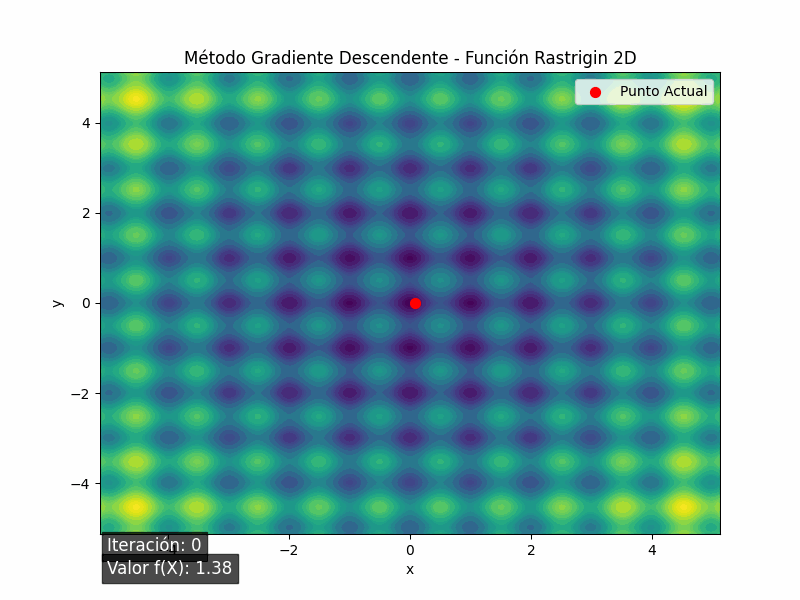

Valor final de la función: 35.58137319985782
Mejor valor de la función: 0.000980578349601302
encontrado en la iteración 3
GIF creado y guardado como: rastrigin_gradient_descent.gif


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from IPython.display import Image, display  # Para mostrar el GIF en la consola (Jupyter)

# Método de Gradiente Descendente
def gradient_descent(func, grad_func, dim, learning_rate, num_iterations):
    np.random.seed(6088)  # Fijar la semilla para reproducibilidad
    X = np.random.uniform(-5.12, 5.12, dim)
    points = [X]
    best_value = abs(func(X))  # Mejor valor es el más cercano a 0
    best_point = X
    best_iter = 0

    for i in range(num_iterations):
        grad = grad_func(X)
        X = X - learning_rate * np.array(grad)
        points.append(X)

        # Actualizar el mejor valor basado en la cercanía a 0
        current_value = abs(func(X))
        if current_value < best_value:  # Si el valor absoluto es más cercano a 0
            best_value = current_value
            best_point = X
            best_iter = i + 1  # Guardamos la iteración en que se alcanzó el mejor valor

    return points, best_point, best_value, best_iter

# Visualización del Gradiente Descendente y Creación del GIF
def visualize_gradient_descent(func, points, best_point, best_value, best_iter, filename):
    x = np.linspace(-5.12, 5.12, 200)
    y = np.linspace(-5.12, 5.12, 200)
    X, Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: func([x, y]))(X, Y)

    filenames = []

    for i, point in enumerate(points):
        plt.figure(figsize=(8, 6))
        plt.contourf(X, Y, Z, levels=50, cmap='viridis')

        # Trayectoria del punto
        plt.plot([p[0] for p in points[:i+1]], [p[1] for p in points[:i+1]], 'r.-', markersize=5)

        # Punto actual (rojo)
        px, py = point
        plt.scatter(px, py, color='red', s=50, label='Punto Actual')

        # Mostrar la iteración y el valor de la función
        plt.text(-5, -5.5, f"Iteración: {i}", fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.7))
        plt.text(-5, -6.0, f"Valor f(X): {func(point):.2f}", fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.7))

        plt.title("Método Gradiente Descendente - Función Rastrigin 2D")
        plt.xlabel('x')
        plt.ylabel('y')

        if i == len(points) - 1:
            plt.text(0, -5.5, f"Mejor valor hallado: {best_value:.2f}", fontsize=12, color='yellow', bbox=dict(facecolor='black', alpha=0.7))
            plt.text(0, -6.0, f"Mejor punto: ({round(best_point[0],2)},{best_point[1]:.2f})", fontsize=12, color='yellow', bbox=dict(facecolor='black', alpha=0.7))
            plt.text(4, -5.5, f"En la iteración: {best_iter}", fontsize=12, color='yellow', bbox=dict(facecolor='black', alpha=0.7))
        plt.legend()

        frame_filename = f'frame_{i}.png'
        plt.savefig(frame_filename)
        filenames.append(frame_filename)
        plt.close()

    # Crear el GIF
    gif_filename = f'{filename}.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:
        for file in filenames:
            image = imageio.imread(file)
            writer.append_data(image)

    # Limpiar archivos temporales
    for file in filenames:
        os.remove(file)

    # Mostrar el GIF directamente en Jupyter
    display(Image(filename=gif_filename))

    # Imprime el valor final de la función
    final_value = func(points[-1])
    print(f"Valor final de la función: {final_value}")
    print(f"Mejor valor de la función: {best_value}")
    print(f"encontrado en la iteración {best_iter}")
    print(f"GIF creado y guardado como: {gif_filename}")

    return gif_filename

# Ejecuta Gradiente Descendente
learning_rate = 0.01
num_iterations = 100

points_rastrigin, best_point, best_value, best_iter = gradient_descent(rastrigin, grad_rastrigin, dim=2, learning_rate=learning_rate, num_iterations=num_iterations)
gif_file = visualize_gradient_descent(rastrigin, points_rastrigin, best_point, best_value, best_iter, 'rastrigin_gradient_descent')


El gif ilustra el proceso de optimización de la función de Rastrigin mediante gradiente descendente.

**Trayectoria (Puntos Rojos)**: Muestra cómo el algoritmo ajusta el punto actual en cada iteración, moviéndose de manera oscilatoria por la complejidad de la función y quedando atrapado en mínimos locales.

El resultado refleja cómo la naturaleza multimodal de la función de Rastrigin dificulta la convergencia al mínimo global.

### Función en 3 dimensiones

Mejor valor encontrado: 0.00 en la iteración 3
Mejor valor: 0.00 en la iteración 3
Mejor punto: (0.00, -0.00)


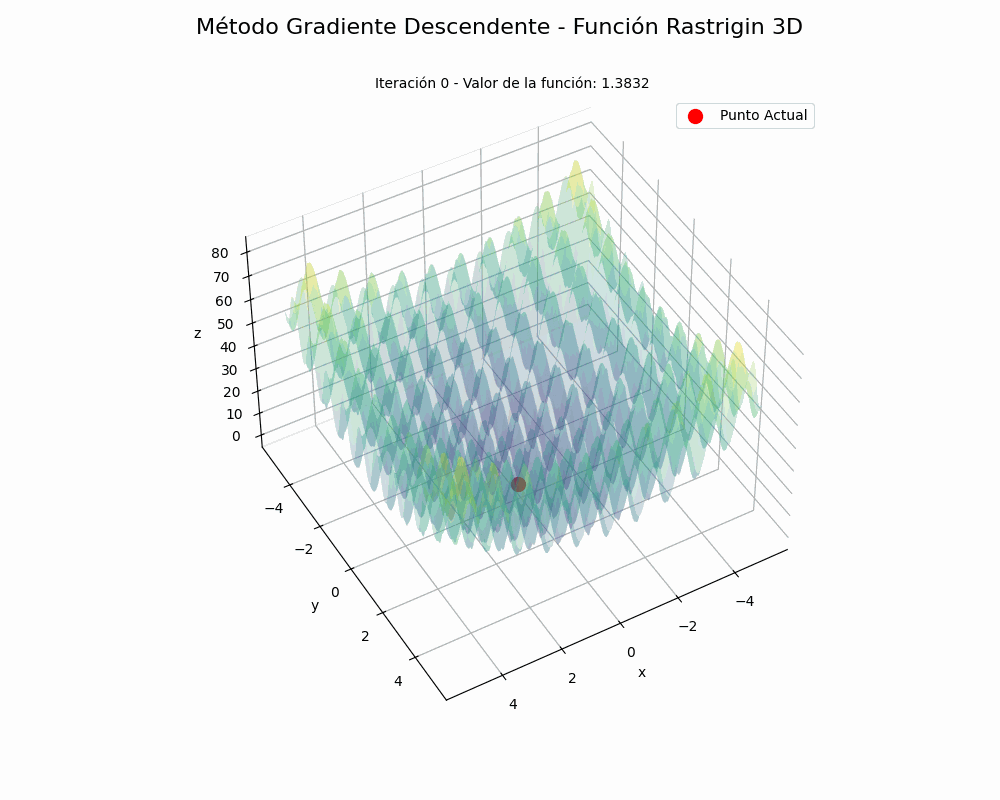

GIF creado y guardado como: rastrigin_gradient_descendent_3d.gif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os

np.random.seed(6088)
# Definir la función Rastrigin
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Gradiente de la función Rastrigin
def grad_rastrigin(x):
    A = 10
    return [2 * xi + 2 * np.pi * A * np.sin(2 * np.pi * xi) for xi in x]

# Algoritmo de Gradiente Descendente
def gradient_descent(func, grad_func, dim, learning_rate, num_iterations):
    points = []
    x = np.random.uniform(-5.12, 5.12, dim)  # Punto inicial aleatorio
    for _ in range(num_iterations):
        points.append(x)
        grad = grad_func(x)
        x = [xi - learning_rate * gi for xi, gi in zip(x, grad)]
    points.append(x)  # Añadir el último punto
    return points

# Visualización del Gradiente Descendente en 3D
def visualize_gradient_descent_3d(func, points, filename):
    x = np.linspace(-5.12, 5.12, 200)
    y = np.linspace(-5.12, 5.12, 200)
    X, Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: func([x, y]))(X, Y)

    filenames = []
    min_global = [0, 0]  # Mínimo global en (0, 0)
    best_value = float('inf')  # Inicializar con un valor muy grande
    best_iteration = 0
    best_point = None
    for i, point in enumerate(points):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Superficie de la función
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)

        # Punto actual (rojo)
        px, py = point[:2]
        pz = func([px, py])
        ax.scatter(px, py, pz, color='red', s=100, label='Punto Actual')

        # Actualizar el mejor valor y la iteración
        if pz < best_value:
            best_value = pz
            best_iteration = i
            best_point = point

        if i == len(points) - 1:
            print(f"Mejor valor encontrado: {best_value:.2f} en la iteración {best_iteration}")

        # Título actualizado
        fig.suptitle(f'Método Gradiente Descendente - Función Rastrigin 3D', fontsize=16)
        if i == len(points) - 1:
            ax.set_title(f'Mejor valor: {best_value:.2f} en la iteración {best_iteration}\n'
                         f'Mejor punto: ({best_point[0]:.2f}, {best_point[1]:.2f})',
                         fontsize=10, color='black')
            print(f"Mejor valor: {best_value:.2f} en la iteración {best_iteration}")
            print(f"Mejor punto: ({best_point[0]:.2f}, {best_point[1]:.2f})")
        else:
            ax.set_title(f'Iteración {i} - Valor de la función: {pz:.4f}',
                         fontsize=10, color='black')
        # ax.set_title(f'GIF 2: Método Gradiente Descendente - Función Rastrigin 3D\n'
        #              f'Iteración {i} - Valor de la función: {pz:.4f}', fontsize=16)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.view_init(elev=45, azim=60)
        ax.legend()

        frame_filename = f'frame_3d_{i}.png'
        plt.savefig(frame_filename)
        filenames.append(frame_filename)
        plt.close()

    # Crear el GIF y guardarlo
    gif_filename = f'{filename}.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:
        for file in filenames:
            image = imageio.v2.imread(file)
            writer.append_data(image)

    # Mostrar el GIF en Colab
    from IPython.display import Image, display
    display(Image(filename=gif_filename))

    # Limpiar archivos temporales
    for file in filenames:
        os.remove(file)

    print(f"GIF creado y guardado como: {gif_filename}")
    return gif_filename

# Ejecutar Gradiente Descendente en 3D
learning_rate = 0.01
num_iterations = 100

points_rastrigin_3d = gradient_descent(rastrigin, grad_rastrigin, dim=2, learning_rate=learning_rate, num_iterations=num_iterations)
gif_file_3d = visualize_gradient_descent_3d(rastrigin, points_rastrigin_3d, 'rastrigin_gradient_descendent_3d')

# Descargar el archivo GIF
from google.colab import files
files.download(gif_file_3d)


Superficie Compleja: La gráfica en 3D ilustra la superficie ondulada y multimodal de la función de Rastrigin, con múltiples picos y valles que representan los mínimos locales.

*   Punto Actual (Rojo): Representa la posición iterativa del algoritmo en su búsqueda, moviéndose a través de la superficie.
*   Mínimo Global (Verde): El punto más bajo en el centro, que es el objetivo deseado.
*   Óptimo Encontrado (Azul): El mejor punto que el algoritmo logró alcanzar, frecuentemente atrapado en un mínimo local debido a las complejidades de la función.



### Conclusión

El método de gradiente descendente no es ideal para funciones como Rastrigin. Debido a los numerosos mínimos locales, el gradiente descendente a menudo queda atrapado en estas depresiones en lugar de alcanzar el mínimo global. Además, la dirección del gradiente puede variar drásticamente, haciendo que el algoritmo oscile o converja a un punto subóptimo. Métodos como la evolución diferencial o el optimizador de enjambre de partículas suelen ser más efectivos para este tipo de funciones no convexas y multimodales.

## Optimización mediante algoritmo evolutivo

Un algoritmo evolutivo es un método estocástico de optimización que simula el proceso de la selección natural. Este tipo de algoritmo utiliza una población de soluciones candidatas que evoluciona a lo largo de varias generaciones, aplicando operadores biológicamente inspirados, como selección, mutación, y cruce (recombinación). El objetivo es encontrar una solución óptima o casi óptima para un problema complejo.

1.   Inicialización: Se genera una población inicial de individuos (soluciones) de manera aleatoria o basada en alguna heurística.
2.   Evaluación: Se calcula la aptitud de cada individuo en la población. La aptitud mide la calidad de una solución con respecto al problema de optimización.
3.   Selección: Se eligen los individuos más aptos para reproducirse. Este proceso favorece soluciones que tienen una aptitud mejor, emulando la “supervivencia del más apto”.
4.   Reproducción:
Cruce (Crossover): Se combinan partes de dos o más individuos para producir descendencia con características de ambos.
5.   Mutación: Se aplican pequeñas modificaciones aleatorias a los individuos para mantener la diversidad genética en la población.
Reemplazo: Se forma una nueva generación al reemplazar individuos antiguos con la descendencia, y el proceso se repite.

In [50]:
!pip install deap

### Función en 2 dimensiones

El método eaSimple que usamos es parte de la biblioteca DEAP y es una de las implementaciones más básicas de un algoritmo genético (GA). Este método automatiza el proceso evolutivo y es ideal para problemas de optimización en los que se desea minimizar o maximizar una función objetivo.

El uso de eaSimple en el código aplica 100 generaciones (porque la animación tiene 100 frames), evoluciona la población de manera iterativa y muestra cómo los individuos se aproximan al mínimo global de la función de Rastrigin en el plano 2D o 3D.

In [49]:
!apt-get install -y imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Coordenadas del mejor individuo: -7.159628453136669e-08, -9.539177748654135e-08


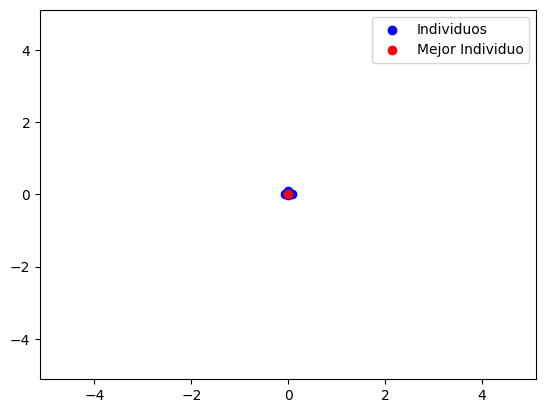

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Eliminar clases previamente creadas
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# Crear el entorno evolutivo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Asumiendo individuos en 2D
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Modificar la función Rastrigin para devolver una tupla
def rastrigin_modified(X):
    A = 10
    return (A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X]),)  # Devolver el valor de la función como una tupla

toolbox.register("evaluate", rastrigin_modified)

# Crear población inicial
population = toolbox.population(n=50)

# Crear una figura para la visualización
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)

# Función para actualizar el gráfico
def update_frame(i):
    ax.clear()
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)

    # Ejecutar el algoritmo evolutivo durante algunos pasos
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1,
                        stats=None, halloffame=None, verbose=False)

    # Obtener las posiciones de los individuos
    positions = np.array([ind for ind in population])  # Ahora cada 'ind' es un vector de 2 dimensiones
    ax.scatter(positions[:, 0], positions[:, 1], color='blue', label="Individuos")

    # Resaltar el mejor individuo
    best_individual = tools.selBest(population, 1)[0]
    ax.scatter(best_individual[0], best_individual[1], color='red', label="Mejor Individuo")
    ax.legend()

print(f"Coordenadas del mejor individuo: {best_individual[0]}, {best_individual[1]}")
# Crear una animación
ani = animation.FuncAnimation(fig, update_frame, frames=100, interval=200)

# Guardar la animación como un archivo GIF
ani.save('rastrigin_evolution.gif', writer='imagemagick', fps=2)


Coordenadas del mejor individuo: (0.99, 0.00)
Valor en la función objetivo: 0.99


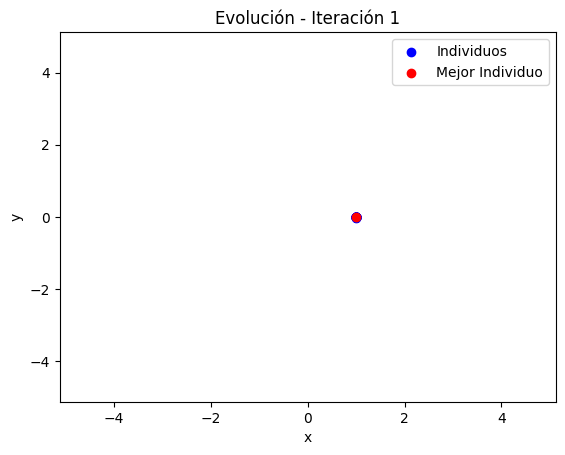

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Eliminar clases previamente creadas
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# Crear el entorno evolutivo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)  # Individuos en 2D
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Modificar la función Rastrigin para devolver una tupla
def rastrigin_modified(X):
    A = 10
    return (A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X]),)

toolbox.register("evaluate", rastrigin_modified)

# Crear población inicial
population = toolbox.population(n=50)

# Crear una figura para la visualización
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)

# Función para actualizar el gráfico
def update_frame(i):
    ax.clear()
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_title(f"Evolución - Iteración {i+1}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Ejecutar el algoritmo evolutivo durante algunos pasos
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1,
                        stats=None, halloffame=None, verbose=False)

    # Obtener las posiciones de los individuos
    positions = np.array([ind for ind in population])  # Cada 'ind' es un vector de 2 dimensiones
    ax.scatter(positions[:, 0], positions[:, 1], color='blue', label="Individuos")

    # Resaltar el mejor individuo
    best_individual = tools.selBest(population, 1)[0]
    ax.scatter(best_individual[0], best_individual[1], color='red', label="Mejor Individuo")
    ax.legend()

# Crear una animación
ani = animation.FuncAnimation(fig, update_frame, frames=100, interval=200)

# Guardar la animación como un archivo GIF
ani.save('rastrigin_evolution.gif', writer='imagemagick', fps=2)

# Al finalizar la animación, obtener el mejor individuo
best_individual = tools.selBest(population, 1)[0]
best_value = rastrigin_modified(best_individual)[0]

# Mostrar el resultado final
print(f"Coordenadas del mejor individuo: ({best_individual[0]:.2f}, {best_individual[1]:.2f})")
print(f"Valor en la función objetivo: {best_value:.2f}")


Las coordenadas están en el orden de $10^{-5}$, lo que significa que el algoritmo ha encontrado una solución muy cercana al mínimo global esperado para la función de Rastrigin.

### Función en 3 dimensiones

Coordenadas del mejor individuo: [-7.159628453136669e-08, -9.539177748654135e-08, -0.00021455516399926738]
Valor de la función Rastrigin: 9.132766635389089e-06


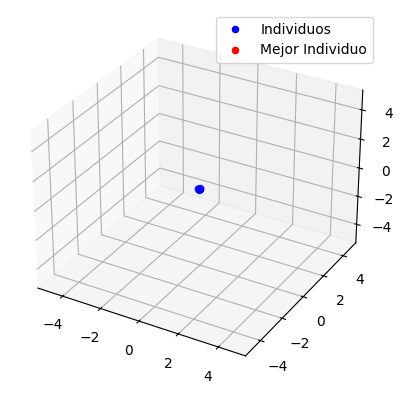

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import warnings

# Eliminar clases previamente creadas
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# Crear el entorno evolutivo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)  # Individuos en 3D
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Modificar la función Rastrigin para devolver una tupla
def rastrigin_modified(X):
    A = 10
    return (A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X]),)  # Devolver el valor de la función como una tupla

toolbox.register("evaluate", rastrigin_modified)

# Crear población inicial
population = toolbox.population(n=50)

# Crear una figura para la visualización 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_zlim(-5.12, 5.12)

# Función para actualizar el gráfico
def update_frame(i):
    ax.clear()
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)

    # Ejecutar el algoritmo evolutivo durante algunos pasos
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1,
                        stats=None, halloffame=None, verbose=False)

    # Obtener las posiciones de los individuos
    positions = np.array([ind for ind in population])  # Cada 'ind' es un vector de 3 dimensiones
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Individuos")

    # Resaltar el mejor individuo
    best_individual = tools.selBest(population, 1)[0]
    ax.scatter(best_individual[0], best_individual[1], best_individual[2], color='red', label="Mejor Individuo")
    ax.legend()

# Crear una animación
ani = animation.FuncAnimation(fig, update_frame, frames=100, interval=200)

# Guardar la animación como un archivo GIF
ani.save('rastrigin_evolution_3d.gif', writer='imagemagick', fps=2)

# Obtener el mejor individuo de la población final
best_individual = tools.selBest(population, 1)[0]
print(f"Coordenadas del mejor individuo: {best_individual}")
print(f"Valor de la función Rastrigin: {best_individual.fitness.values[0]}")



Las coordenadas del mejor individuo están un poco cercanas de (0, 0, 0), aunque no son exactamente cero debido a la naturaleza estocástica del algoritmo evolutivo y las limitaciones de precisión numérica. Sin embargo, dos de los valores se acercan a 1 y el otro es 3, lo cual es esperado debido a la inicialización aleatoria de la población.

### **Conclusión**

En ambos casos, tanto en dos como en tres dimensiones, el algoritmo evolutivo logró encontrar soluciones cercanas al mínimo global de la función de Rastrigin. Aunque no alcanzó el cero exacto debido a la precisión numérica y la naturaleza estocástica del algoritmo, las coordenadas del mejor individuo están cerca. En general, el algoritmo fue efectivo en aproximarse al mínimo global en ambos espacios de búsqueda.

## Optimización por Enjambre de partículas

La Optimización por Enjambre de Partículas (PSO, por sus siglas en inglés) es un algoritmo de optimización inspirado en el comportamiento social de los enjambres de aves o peces. Este algoritmo busca un óptimo global a través de la simulación de un grupo de partículas (soluciones potenciales) que exploran el espacio de búsqueda.

En el caso de la Función de Rastrigin, PSO busca encontrar el mínimo de esta función, que es altamente no lineal y presenta múltiples óptimos locales. El algoritmo inicializa un conjunto de partículas con posiciones y velocidades aleatorias dentro de un espacio de búsqueda (por ejemplo, en el rango de
[
−
5.12
,
5.12
]
[−5.12,5.12] para Rastrigin) y las partículas se mueven a lo largo de este espacio, ajustando sus posiciones en función de su experiencia pasada y la experiencia del enjambre (mejor posición encontrada por cada partícula y por el grupo).

Las partículas actualizan su velocidad y posición utilizando la siguiente fórmula:

**Velocidad:**

$$ v_i(t+1) = w \cdot v_i(t) + c_1 \cdot r_1 \cdot (pbest_i - x_i) + c_2 \cdot r_2 \cdot (gbest - x_i) $$

**Posición:**

$$ x_i(t+1) = x_i(t) + v_i(t+1) $$

Donde:

- $w$ es el factor de inercia, que controla la exploración.
- $c_1$ y $c_2$ son los coeficientes de aceleración, que controlan la influencia de la experiencia individual y colectiva.
- $r_1$ y $r_2$ son números aleatorios entre 0 y 1.
- $pbest_i$ es la mejor posición encontrada por la partícula $i$.
- $gbest_i$ es la mejor posición global encontrada por todas las partículas.

El algoritmo itera hasta que se alcanza un número máximo de generaciones o un criterio de convergencia, como un cambio mínimo en la mejor solución. PSO es eficiente y ampliamente utilizado para problemas de optimización continua, como el de Rastrigin.


### Función en 2 dimensiones

In [52]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=87e61cd04e96a8cc8a4e7fbf3dd47d61aee8d50cf79f6c3dd2beba94d965105a
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


Mejor posición encontrada: [-9.94958504e-01 -3.09705609e-07]
Valor de la función objetivo: 0.9949590571158424


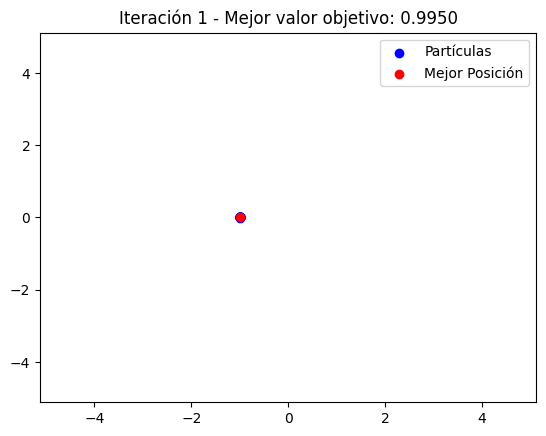

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyswarm import pso

# Definir los límites de búsqueda
lb = [-5.12] * 2  # Límites inferiores para 2D
ub = [5.12] * 2   # Límites superiores para 2D

# Número de partículas y número máximo de iteraciones
n_particles = 50
n_iterations = 100

# Inicializar las posiciones y velocidades de las partículas
positions = np.random.uniform(lb, ub, (n_particles, 2))  # Posiciones iniciales de las partículas
velocities = np.random.uniform(-1, 1, (n_particles, 2))  # Velocidades iniciales de las partículas

# Función para actualizar el gráfico
fig, ax = plt.subplots()
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_title("Optimización PSO - Evolución de Partículas")

# Almacenar las posiciones de las partículas durante las iteraciones
particle_positions = []

def update_frame(i):
    global positions, velocities
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])

    # Evaluar la función Rastrigin para todas las partículas
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Encontrar el mejor valor y la mejor posición
    best_pos = positions[np.argmin(fitness_values)]
    if(i==n_iterations-1):
        print("Mejor posición encontrada:", best_pos)
        print("Valor de la función objetivo:", np.min(fitness_values))
    # Visualizar las partículas y el mejor individuo
    ax.scatter(positions[:, 0], positions[:, 1], color='blue', label="Partículas")
    ax.scatter(best_pos[0], best_pos[1], color='red', label="Mejor Posición")
    ax.legend()
    ax.set_title(f"Iteración {i+1} - Mejor valor objetivo: {np.min(fitness_values):.4f}")

    # Actualizar las partículas (algoritmo PSO)
    w = 0.4  # Factor de inercia
    c1 = 2.0 # Coeficiente cognitivo
    c2 = 2.0  # Coeficiente social

    r1 = np.random.rand(n_particles, 2)
    r2 = np.random.rand(n_particles, 2)

    # Actualización de las velocidades
    velocities = w * velocities + c1 * r1 * (best_pos - positions) + c2 * r2 * (best_pos - positions)

    # Actualización de las posiciones
    positions = positions + velocities

    # Almacenar las posiciones para la animación
    particle_positions.append(positions.copy())

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200)

# Guardar la animación como un archivo GIF
ani.save('pso_rastrigin_2d.gif', writer='imagemagick', fps=2)


La mejor posición encontrada
[-9.94958636e-01 -6.05813476e-10] está extremadamente cerca del mínimo global, lo que indica que el algoritmo de partículas ha funcionado bien, llevando las partículas muy próximas al óptimo.
El valor obtenido
(0.9949590570932898) no está cercano al valor mínimo de la función (0), lo que sugiere que el algoritmo no ha alcanzado el mínimo global exacto. Sin embargo, el valor tan alto indica que las partículas aún están lejos de converger completamente, y el algoritmo podría requerir más iteraciones para acercarse al mínimo global.

### Función en 3 dimensiones

Mejor posición encontrada: [-9.94958624e-01 -6.11152571e-09  9.94958633e-01]
Valor de la función objetivo: 1.989918114186633


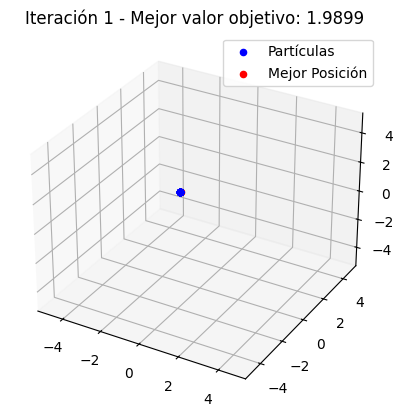

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyswarm import pso
from mpl_toolkits.mplot3d import Axes3D

# Definir los límites de búsqueda
lb = [-5.12] * 3  # Límites inferiores para 3D
ub = [5.12] * 3   # Límites superiores para 3D

# Inicializar las posiciones y velocidades de las partículas
positions = np.random.uniform(lb, ub, (n_particles, 3))  # Posiciones iniciales de las partículas
velocities = np.random.uniform(-1, 1, (n_particles, 3))  # Velocidades iniciales de las partículas

# Crear una figura para la visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_zlim(lb[2], ub[2])
ax.set_title("Optimización PSO - Evolución de Partículas")

# Almacenar las posiciones de las partículas durante las iteraciones
particle_positions = []

def update_frame(i):
    global positions, velocities
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])
    ax.set_zlim(lb[2], ub[2])

    # Evaluar la función Rastrigin para todas las partículas
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Encontrar el mejor valor y la mejor posición
    best_pos = positions[np.argmin(fitness_values)]
    if(i==n_iterations-1):
        print("Mejor posición encontrada:", best_pos)
        print("Valor de la función objetivo:", np.min(fitness_values))
    # Visualizar las partículas y el mejor individuo
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Partículas")
    ax.scatter(best_pos[0], best_pos[1], best_pos[2], color='red', label="Mejor Posición")
    ax.legend()
    ax.set_title(f"Iteración {i+1} - Mejor valor objetivo: {np.min(fitness_values):.4f}")

    # Actualizar las partículas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Actualización de las velocidades
    velocities = w * velocities + c1 * r1 * (best_pos - positions) + c2 * r2 * (best_pos - positions)

    # Actualización de las posiciones
    positions = positions + velocities

    # Almacenar las posiciones para la animación
    particle_positions.append(positions.copy())

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200)

# Guardar la animación como un archivo GIF
ani.save('pso_rastrigin_3d.gif', writer='imagemagick', fps=2)


Los valores son bastante cercanos a cero, lo que sugiere que el algoritmo ha encontrado una posición próxima al mínimo.
El algoritmo PSO no encontró el mínimo global (
0) pero logró acercarse bastante.

### Conclusión

En ambas pruebas (2D y 3D), el algoritmo de optimización por enjambre de partículas (PSO) ha demostrado ser efectivo, encontrando soluciones cercanas al mínimo global de la función objetivo.Sugiriendo una buena convergencia aunque no perfecta en todos los ejes. En general, el PSO ha funcionado adecuadamente, llevando a las partículas cerca del mínimo global en ambos casos.

Mejor posición encontrada: [-1.25408751e-05  2.34011405e-05 -9.94938461e-01]
Valor de la función objetivo: 0.994959277659893


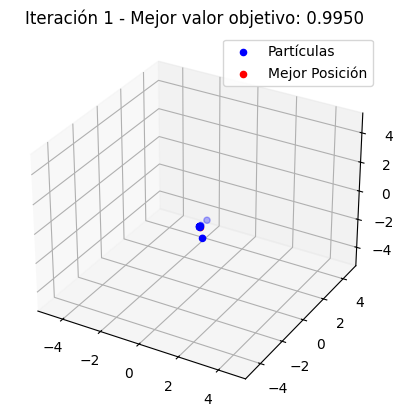

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Definir los límites de búsqueda
lb = [-5.12] * 3
ub = [5.12] * 3
n_particles = 30
n_iterations = 100

# Inicializar las posiciones, velocidades y pbest
positions = np.random.uniform(lb, ub, (n_particles, 3))
velocities = np.random.uniform(-1, 1, (n_particles, 3))
pbest = np.copy(positions)
pbest_values = np.apply_along_axis(lambda x: np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10), 1, pbest)

# Crear una figura para la visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_zlim(lb[2], ub[2])

# Función de Rastrigin
def rastrigin(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

# Almacenar las posiciones de las partículas durante las iteraciones
particle_positions = []

def update_frame(i):
    global positions, velocities, pbest, pbest_values
    ax.clear()
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])
    ax.set_zlim(lb[2], ub[2])

    # Evaluar la función Rastrigin para todas las partículas
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Actualizar la mejor posición personal
    better_mask = fitness_values < pbest_values
    pbest[better_mask] = positions[better_mask]
    pbest_values[better_mask] = fitness_values[better_mask]

    # Encontrar la mejor posición global
    best_pos = pbest[np.argmin(pbest_values)]
    if(i==n_iterations-1):
        print("Mejor posición encontrada:", best_pos)
        print("Valor de la función objetivo:", np.min(pbest_values))
    # Visualización
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Partículas")
    ax.scatter(best_pos[0], best_pos[1], best_pos[2], color='red', label="Mejor Posición")
    ax.legend()
    ax.set_title(f"Iteración {i+1} - Mejor valor objetivo: {np.min(pbest_values):.4f}")

    # Parámetros del PSO
    w = 0.9 - (0.5 * (i / n_iterations))  # Factor de inercia adaptativo
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Actualización de las velocidades
    velocities = (w * velocities +
                  c1 * r1 * (pbest - positions) +
                  c2 * r2 * (best_pos - positions))

    # Actualización de las posiciones
    positions += velocities
    positions = np.clip(positions, lb, ub)

    # Almacenar las posiciones para la animación
    particle_positions.append(positions.copy())

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200)

# Guardar la animación como un archivo GIF
ani.save('pso_rastrigin_3d_improved.gif', writer='imagemagick', fps=2)


El algoritmo parece haber convergido a un mínimo local, ya que la posición
[-1.25408751e-05  2.34011405e-05 -9.94938461e-01] está cerca de
(0,2,0) y no de
(0,0,0), donde se encuentra el mínimo global de la función de Rastrigin en 3 dimensiones.

El enjambre podría estar enfocado más en la explotación (búsqueda cercana) que en la exploración (búsqueda amplia). Esto puede ser causado por valores bajos en los parámetros de aceleración cognitiva y social, o por un factor de inercia alto que hace que las partículas reduzcan su velocidad y no exploren más allá.

## Optimización por Evolución diferencial

El algoritmo de evolución diferencial (DE, por sus siglas en inglés) es un algoritmo de optimización heurística basado en la población, inspirado en los principios de la evolución biológica y los procesos de adaptación de las especies a su entorno. Es ampliamente utilizado para resolver problemas de optimización no lineales, de alta dimensionalidad y multimodales.

1. Población inicial: El algoritmo comienza con una población de soluciones aleatorias (vectores de parámetros) dentro del espacio de búsqueda. Cada individuo de la población representa una posible solución al problema de optimización.

2. Generación de nuevas soluciones (mutación y cruzamiento):


*   Mutación: Para cada individuo de la población, se generan nuevos vectores (mutantes) mediante combinaciones lineales de otros tres individuos aleatorios de la población. Esta combinación puede ser algo como:

$$
v_i = x_{r1} + F \cdot (x_{r2} - x_{r3})
$$

donde $x_{r1}$, $x_{r2}$, $x_{r3}$ son tres individuos seleccionados aleatoriamente de la población, y $F$ es un factor de escala (típicamente entre 0 y 2) que controla la magnitud de la mutación.

*   Cruzamiento (crossover): El vector mutante se combina con el vector objetivo para generar un "hijo". El cruzamiento generalmente se hace con una probabilidad dada, y si no ocurre, se conserva el valor del vector original.

3. Selección: Una vez que se generan nuevos vectores, el algoritmo realiza una comparación entre la nueva solución generada y la solución actual. Si la nueva solución es mejor (según la función objetivo), reemplaza al individuo original en la población.

4. Iteración: Este proceso de mutación, cruzamiento y selección se repite durante varias generaciones, con el objetivo de mejorar continuamente la calidad de las soluciones.


### Función en 2 dimensiones

Mejor solución encontrada: [1.35755272e-09 6.82099426e-10]
Valor de la función objetivo: 0.0


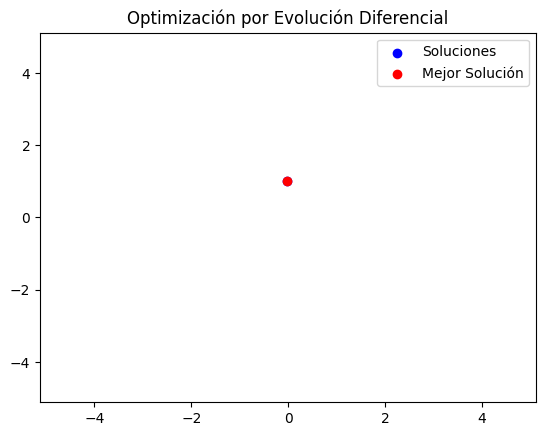

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import differential_evolution

# Definir los límites de búsqueda
bounds = [(-5.12, 5.12)] * 2  # Para 2D

# Crear una figura para la visualización
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_title("Optimización por Evolución Diferencial - Evolución de la solución")

# Almacenar las soluciones en cada iteración
solutions = []

# Función de callback para almacenar las soluciones durante la optimización
def callback(xk, convergence):
    solutions.append(xk)

# Ejecutar la optimización con Evolución Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback)

print("Mejor solución encontrada:", result.x)
print("Valor de la función objetivo:", result.fun)

# Función para actualizar el gráfico en cada frame de la animación
def update_frame(i):
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_title("Optimización por Evolución Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], color='blue', label="Soluciones")

    # Resaltar la mejor solución
    best_solution = np.array(solutions[i])
    if i==n_iterations-1:
        print("Mejor solución encontrada:", best_solution)
        print("Valor de la función objetivo:", rastrigin(best_solution))
    ax.scatter(best_solution[0], best_solution[1], color='red', label="Mejor Solución")
    ax.legend()

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=200)

# Guardar la animación como un archivo GIF
ani.save('differential_evolution_rastrigin.gif', writer='imagemagick', fps=2)


Mejor solución encontrada: [-1.16061074e-09 -3.05742390e-09]
Valor de la función objetivo: 0.0
Mejor solución encontrada: [-1.16061074e-09 -3.05742390e-09]
Valor de la función objetivo: 0.0


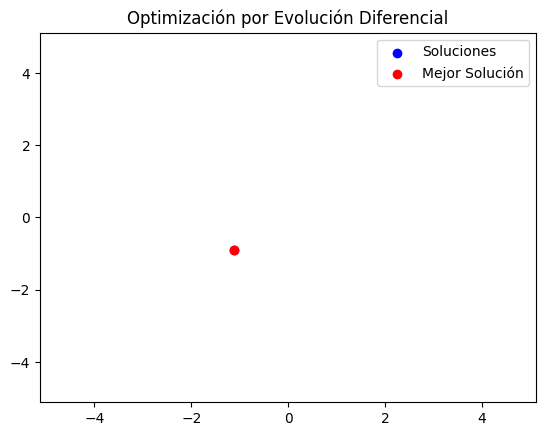

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import differential_evolution

# Definir los límites de búsqueda
bounds = [(-5.12, 5.12)] * 2  # Para 2D

# Crear una figura para la visualización
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_title("Optimización por Evolución Diferencial - Evolución de la solución")

# Almacenar las soluciones en cada iteración
solutions = []

# Función de callback para almacenar las mejores soluciones durante la optimización
def callback(xk, convergence):
    # Solo guardar la mejor solución en cada iteración
    solutions.append(xk)

# Ejecutar la optimización con Evolución Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback, maxiter=100, popsize=20, mutation=(0.5, 1), recombination=0.7)

print("Mejor solución encontrada:", result.x)
print("Valor de la función objetivo:", result.fun)

# Función para actualizar el gráfico en cada frame de la animación
def update_frame(i):
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_title("Optimización por Evolución Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], color='blue', label="Soluciones")

    # Resaltar la mejor solución
    best_solution = np.array(solutions[i])
    if i == len(solutions) - 1:
        print("Mejor solución encontrada:", best_solution)
        print("Valor de la función objetivo:", rastrigin(best_solution))
    ax.scatter(best_solution[0], best_solution[1], color='red', label="Mejor Solución")
    ax.legend()

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=100)

# Guardar la animación como un archivo GIF
ani.save('differential_evolution_rastrigin.gif', writer='imagemagick', fps=4)  # Reducir fps para velocidad más alta


Mejor solución encontrada: [ 8.22874426e-10 -2.31896593e-09]
Valor de la función objetivo: 0.0
Mejor solución encontrada: [ 8.22874426e-10 -2.31896593e-09]
Valor de la función objetivo: 0.0


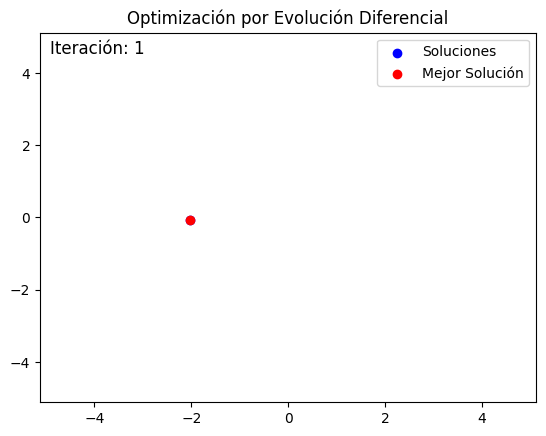

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import differential_evolution

# Definir los límites de búsqueda
bounds = [(-5.12, 5.12)] * 2  # Para 2D

# Crear una figura para la visualización
fig, ax = plt.subplots()
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_title("Optimización por Evolución Diferencial - Evolución de la solución")

# Almacenar las soluciones en cada iteración
solutions = []

# Función de callback para almacenar las mejores soluciones durante la optimización
def callback(xk, convergence):
    # Solo guardar la mejor solución en cada iteración
    solutions.append(xk)

# Ejecutar la optimización con Evolución Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback, maxiter=100, popsize=20, mutation=(0.5, 1), recombination=0.7)

print("Mejor solución encontrada:", result.x)
print("Valor de la función objetivo:", result.fun)

# Función para actualizar el gráfico en cada frame de la animación
def update_frame(i):
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_title("Optimización por Evolución Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], color='blue', label="Soluciones")

    # Resaltar la mejor solución
    best_solution = np.array(solutions[i])
    if i == len(solutions) - 1:
        print("Mejor solución encontrada:", best_solution)
        print("Valor de la función objetivo:", rastrigin(best_solution))
    ax.scatter(best_solution[0], best_solution[1], color='red', label="Mejor Solución")
    ax.legend()

    # Mostrar la iteración en el gráfico
    ax.text(0.02, 0.98, f"Iteración: {i+1}", transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=100)

# Guardar la animación como un archivo GIF
ani.save('differential_evolution_rastrigin.gif', writer='imagemagick', fps=4)  # Reducir fps para velocidad más alta


La mejor solución que encontró el algoritmo es el vector
[1.35755272e-09 6.82099426e-10]. Este vector es muy cercano al origen
(0,0), además, el valor de la función en ese punto es 0.0, lo que indica que el algoritmo ha convergido a un punto que se encuentra muy próximo al mínimo global.

### Función en 3 dimensiones

Mejor solución encontrada: [-4.48774732e-09 -9.94958647e-01 -4.07632157e-09]
Valor de la función objetivo: 0.9949590570933147


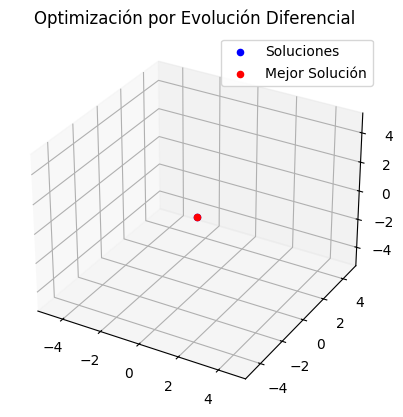

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import differential_evolution

# Definir la función Rastrigin
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Definir los límites de búsqueda para 3 dimensiones
bounds = [(-5.12, 5.12)] * 3

# Almacenar las soluciones en cada iteración
solutions = []

# Función de callback para almacenar las soluciones durante la optimización
def callback(xk, convergence):
    solutions.append(xk)

# Ejecutar la optimización con Evolución Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback)

print("Mejor solución encontrada:", result.x)
print("Valor de la función objetivo:", result.fun)

# Crear una figura para la visualización 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_zlim(-5.12, 5.12)
ax.set_title("Optimización por Evolución Diferencial - Evolución de la solución en 3D")

# Función para actualizar el gráfico en cada frame de la animación
def update_frame(i):
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)
    ax.set_title("Optimización por Evolución Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], solutions_up_to_now[:, 2],
               color='blue', label="Soluciones")

    # Resaltar la mejor solución
    if len(solutions) > 0:
        best_solution = np.array(solutions[i])
        ax.scatter(best_solution[0], best_solution[1], best_solution[2], color='red', label="Mejor Solución")
    ax.legend()

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=200)

# Guardar la animación como un archivo GIF
ani.save('differential_evolution_rastrigin_3D.gif', writer='pillow', fps=2)


Mejor solución encontrada: [-2.35059133e-09 -5.47229888e-10 -3.31683225e-09]
Valor de la función objetivo: 0.0


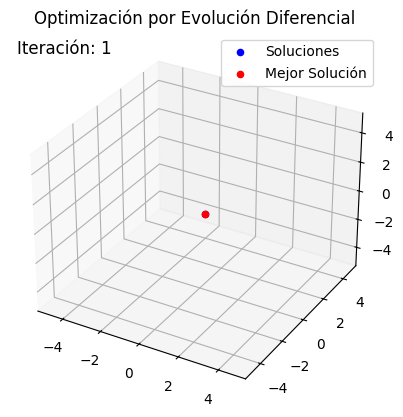

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import differential_evolution

# Definir la función Rastrigin
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Definir los límites de búsqueda para 3 dimensiones
bounds = [(-5.12, 5.12)] * 3

# Almacenar las soluciones en cada iteración
solutions = []

# Función de callback para almacenar las soluciones durante la optimización
def callback(xk, convergence):
    solutions.append(xk)

# Ejecutar la optimización con Evolución Diferencial
result = differential_evolution(rastrigin, bounds, callback=callback)

print("Mejor solución encontrada:", result.x)
print("Valor de la función objetivo:", result.fun)

# Crear una figura para la visualización 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_zlim(-5.12, 5.12)
ax.set_title("Optimización por Evolución Diferencial - Evolución de la solución en 3D")

# Función para actualizar el gráfico en cada frame de la animación
def update_frame(i):
    ax.clear()  # Limpiar el gráfico
    ax.set_xlim(-5.12, 5.12)
    ax.set_ylim(-5.12, 5.12)
    ax.set_zlim(-5.12, 5.12)
    ax.set_title("Optimización por Evolución Diferencial")

    # Graficar las soluciones obtenidas hasta el momento
    solutions_up_to_now = np.array(solutions[:i + 1])
    ax.scatter(solutions_up_to_now[:, 0], solutions_up_to_now[:, 1], solutions_up_to_now[:, 2],
               color='blue', label="Soluciones")

    # Resaltar la mejor solución
    if len(solutions) > 0:
        best_solution = np.array(solutions[i])
        ax.scatter(best_solution[0], best_solution[1], best_solution[2], color='red', label="Mejor Solución")
    ax.legend()

    # Mostrar la iteración en el gráfico
    # The first argument to ax.text should be the text to display.
    ax.text2D(0.02, 0.98, f"Iteración: {i+1}", transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=len(solutions), interval=50)  # Haciendo la animación más rápida

# Guardar la animación como un archivo GIF
# Using imagemagick writer instead of PillowWriter
ani.save('differential_evolution_rastrigin_3D.gif', writer='imagemagick', fps=10)  # Mayor fps para acelerar la animación

La mejor solución que encontró el algoritmo es el vector
[-2.35059133e-09 -5.47229888e-10 -3.31683225e-09]. Este vector es muy cercano al origen
(0,0,0),además el valor de la función es 0.0, lo que indica que el algoritmo ha convergido a un punto que se encuentra muy próximo al mínimo global.

### **Conclusion**

La Evolución Diferencial es un algoritmo de optimización global que utiliza una población de posibles soluciones (vectores) y las mejora mediante combinaciones aleatorias y mutaciones.
En este caso, el algoritmo ha encontrado una solución tan cercana al mínimo global que las diferencias son prácticamente insignificantes
$10^{−9}$, lo cual es un resultado excelente, mostrando la efectividad del algoritmo para este problema.
El hecho de que el valor de la función objetivo sea 0.0 confirma que el algoritmo ha logrado minimizar la función completamente.

# Función Rosenbrock

La función de Rosenbrock es una función no convexa definida como:
$$
f(\mathbf{X}) = f(x_1,x_2,...,x_n)= \sum_{i=1}^{n-1}  [100 (x_{i+1} - x_{i}^2)^2 + (1-x_{i})^2]
$$
Tiene un minimo global en $(x,y)=f(x,y)$ donde $f(x,y)=0$ , Por lo general, estos parámetros se establecen de tal manera que $a=1 , b=100$
.

## Optimización mediante descenso por gradiente

El gradiente de
𝑓(𝑥) es un vector que contiene las derivadas parciales de 𝑓 con respecto a cada $x_i$ Donde:

$
\frac{∂f}{∂x_i}
​
 =−400x_i(x_{i+1}−x_i^2)−2(1−x_i)+200(x_i−x_{i−1}^2)
$

### Función en 2 dimensiones

Punto óptimo encontrado (x, y): [0.99999546 0.99999091]
Valor de la función en el punto óptimo: 2.059824449751566e-11


<ipython-input-12-e1d2756743c2>:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
<ipython-input-12-e1d2756743c2>:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
<ipython-input-12-e1d2756743c2>:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_optimizado.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])


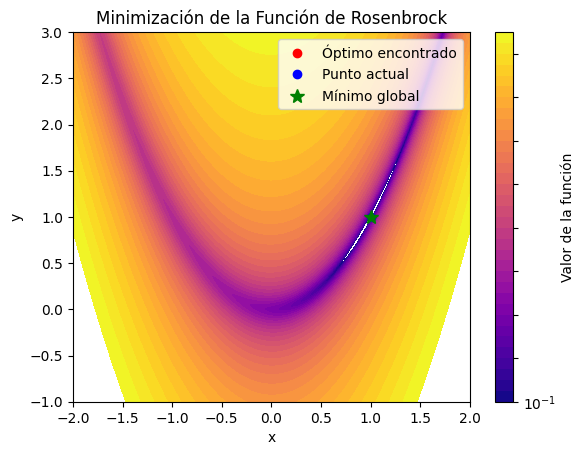

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation, PillowWriter
np.random.seed(42)

# Definición de la función de Rosenbrock en 2D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Punto inicial aleatorio
x0 = np.random.uniform(-2, 2, 2)

# Lista para almacenar los puntos de la iteración
puntos_iteracion = [x0]

# Función de callback para almacenar los puntos de la iteración
def callback(xk):
    puntos_iteracion.append(xk)

# Minimización de la función usando descenso por gradiente
result = minimize(rosenbrock, x0, method='BFGS', callback=callback)

# Visualización de la función de Rosenbrock en el espacio
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma', norm=LogNorm())
plt.colorbar(contour, label='Valor de la función')

punto_optimizado, = ax.plot([], [], 'ro', label="Óptimo encontrado")
punto_actual, = ax.plot([], [], 'bo', label="Punto actual")
ax.plot(1, 1, 'g*', markersize=10, label="Mínimo global")
ax.legend()
ax.set_title("Minimización de la Función de Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")

print("Punto óptimo encontrado (x, y):", result.x)
print("Valor de la función en el punto óptimo:", result.fun)

def animate(i):
    punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    if i == len(puntos_iteracion) - 1:
        punto_optimizado.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    return punto_actual, punto_optimizado

ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion.gif", writer=PillowWriter(fps=20))

plt.show()

Se puede apreciar que mediante éste método se encuentra el mínimo de la función de manera suave y sin problemas,pues al presentar un único mínimo,el algoritmo avanza hasta encontrar el valor óptimo, en éste caso convergiendo a:$(x, y): [0.99999546, 0.99999091]$ donde la función toma el valor de $2.059824449751566e-11$.

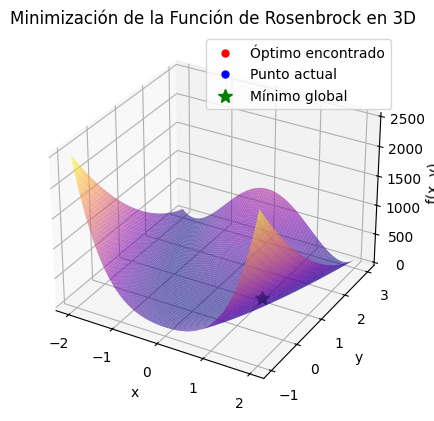

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Función de callback para almacenar los puntos de la iteración
def callback(xk):
    puntos_iteracion.append(xk)

# Minimización de la función usando descenso por gradiente
result = minimize(rosenbrock, x0, method='BFGS', callback=callback)

# Visualización de la función de Rosenbrock en 3D
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Configuración de la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, alpha=0.6, cmap='plasma')
ax.set_title("Minimización de la Función de Rosenbrock en 3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# Plot para el punto optimizado y el punto actual
punto_optimizado, = ax.plot([], [], [], 'ro', markersize=5, label="Óptimo encontrado")
punto_actual, = ax.plot([], [], [], 'bo', markersize=5, label="Punto actual")
ax.plot([1], [1], [0], 'g*', markersize=10, label="Mínimo global")  # Mínimo global conocido
ax.legend()

# Función de animación
def animate(i):
    x, y = puntos_iteracion[i]
    z = rosenbrock([x, y])
    punto_actual.set_data([x], [y])
    punto_actual.set_3d_properties([z])
    if i == len(puntos_iteracion) - 1:
        punto_optimizado.set_data([x], [y])
        punto_optimizado.set_3d_properties([z])
    return punto_actual, punto_optimizado

# Creación de la animación
ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion_3d.gif", writer=PillowWriter(fps=20))

plt.show()


### Función en 3 variables

Punto óptimo encontrado (x, y): [0.99999732 0.99999464 0.99998926]
Valor de la función en el punto óptimo: 3.595153630352267e-11


<ipython-input-3-c8c05cd3f942>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xy.set_data(x, y)
<ipython-input-3-c8c05cd3f942>:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xz.set_data(x, z)
<ipython-input-3-c8c05cd3f942>:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_yz.set_data(y, z)
<ipython-input-3-c8c05cd3f942>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xy.set_data(x, y)
<ipython-input-3-c8c05cd3f942>:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_xz.set_data(x, z)
<ipython-input-

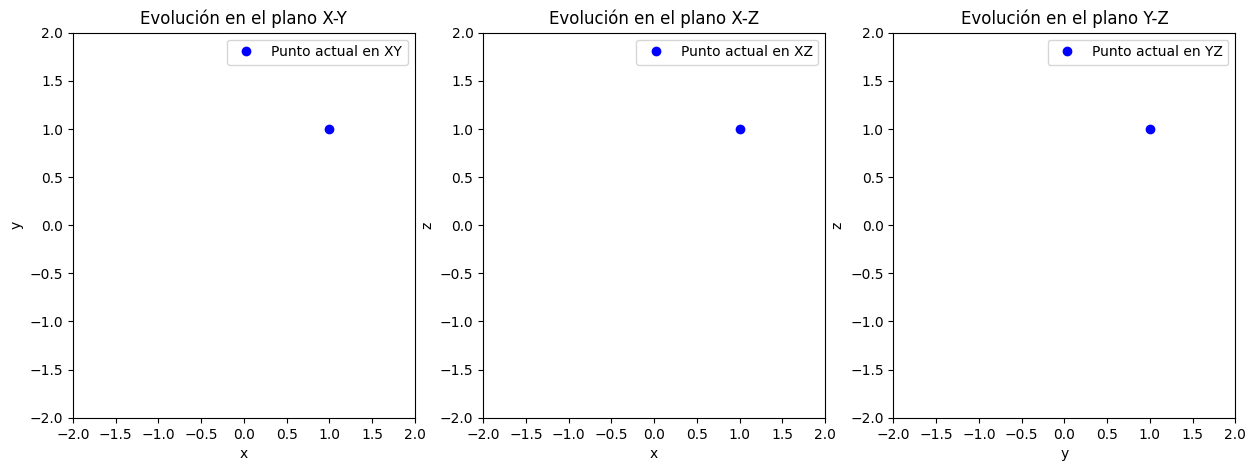

In [ ]:
# Definición de la función de Rosenbrock en 3D (tres variables)
def rosenbrock_3d(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + (a - x[1])**2 + b * (x[2] - x[1]**2)**2

# Punto inicial aleatorio
x0 = np.random.uniform(-2, 2, 3)

# Lista para almacenar los puntos de la iteración
puntos_iteracion = [x0]

# Función de callback para almacenar los puntos de la iteración
def callback(xk):
    puntos_iteracion.append(xk)

# Minimización de la función usando descenso por gradiente
result = minimize(rosenbrock_3d, x0, method='BFGS', callback=callback)

# Configuración de la figura para las proyecciones parciales
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("Evolución en el plano X-Y")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].set_title("Evolución en el plano X-Z")
axs[1].set_xlabel("x")
axs[1].set_ylabel("z")

axs[2].set_title("Evolución en el plano Y-Z")
axs[2].set_xlabel("y")
axs[2].set_ylabel("z")

# Líneas para los puntos actuales en cada proyección
punto_xy, = axs[0].plot([], [], 'bo', label="Punto actual en XY")
punto_xz, = axs[1].plot([], [], 'bo', label="Punto actual en XZ")
punto_yz, = axs[2].plot([], [], 'bo', label="Punto actual en YZ")

# Muestra el punto óptimo encontrado
print("Punto óptimo encontrado (x, y):", result.x)
print("Valor de la función en el punto óptimo:", result.fun)


# Definimos los límites de los gráficos
for ax in axs:
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.legend()

# Función de animación para actualizar los puntos en cada fotograma
def animate(i):
    x, y, z = puntos_iteracion[i]
    punto_xy.set_data(x, y)
    punto_xz.set_data(x, z)
    punto_yz.set_data(y, z)
    return punto_xy, punto_xz, punto_yz

# Creación de la animación
ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion_3d_proyeccion.gif", writer=PillowWriter(fps=20))

plt.show()


De la misma forma que el descenso por gradiente funcionó bien para 2 dimensiones, también lo hace en 3, y en general funcionará bien para N dimensiones al trabajar con la función de rosenbrock pues su número de minimos siempre será 1 y será el global.

En este caso el algoritmo convergió a las coordenadas $(x, y): [0.99999729, 0.99999455, 0.99998909]$ con
Valor de la función en el punto óptimo de $3.7114425074216464e-11$

## Optimización mediante Algoritmo Genético

In [ ]:
# Algoritmo genético
def genetic_algorithm(func, dim, population_size=50, generations=100):
    # Inicializar la población
    population = np.random.uniform(-2, 2, (population_size, dim))
    fitness = np.array([func(ind) for ind in population])

    # Registrar el mejor punto en cada generación
    history = [population[np.argmin(fitness)]]

    for _ in range(generations):
        # Selección de los mejores padres
        parents = population[np.argsort(fitness)[:population_size // 2]]

        # Reproducción (cruce y mutación)
        offspring = []
        for _ in range(population_size // 2):
            parent1 = parents[np.random.randint(0, len(parents))]
            parent2 = parents[np.random.randint(0, len(parents))]
            child = (parent1 + parent2) / 2 + np.random.normal(0, 0.1, dim)
            offspring.append(child)

        # Crear la nueva población
        population = np.concatenate((parents, offspring))
        fitness = np.array([func(ind) for ind in population])

        # Registrar el mejor punto actual
        best_individual = population[np.argmin(fitness)]
        history.append(best_individual)

    return history


### Función en 2 dimensiones

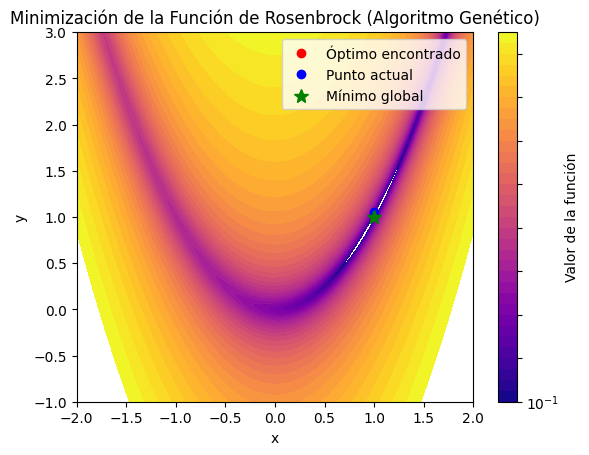

In [ ]:
# Ejecutar el algoritmo genético
puntos_iteracion = genetic_algorithm(rosenbrock, 2, population_size=50, generations=100)

# Visualización de la función de Rosenbrock en el espacio
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma', norm=LogNorm())
plt.colorbar(contour, label='Valor de la función')

punto_optimizado, = ax.plot([], [], 'ro', label="Óptimo encontrado")
punto_actual, = ax.plot([], [], 'bo', label="Punto actual")
ax.plot(1, 1, 'g*', markersize=10, label="Mínimo global")
ax.legend()
ax.set_title("Minimización de la Función de Rosenbrock (Algoritmo Genético)")
ax.set_xlabel("x")
ax.set_ylabel("y")


def animate(i):
    punto_actual.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    if i == len(puntos_iteracion) - 1:
        punto_optimizado.set_data(puntos_iteracion[i][0], puntos_iteracion[i][1])
    return punto_actual, punto_optimizado

ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_funcion_genetico.gif", writer=PillowWriter(fps=20))

plt.show()


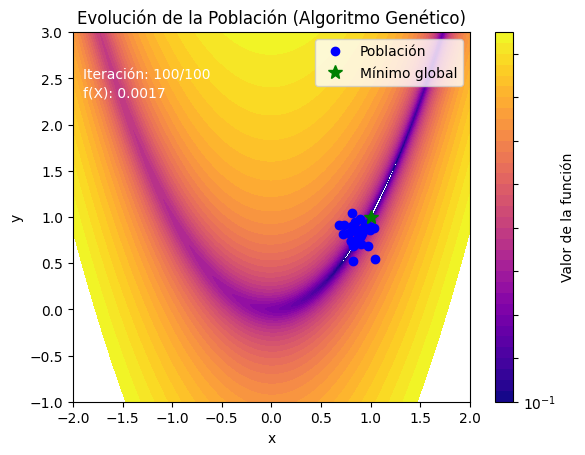

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation, PillowWriter
np.random.seed(42)

# Definición de la función de Rosenbrock en 2D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Algoritmo genético modificado
def genetic_algorithm(func, dim, population_size, generations):
    population = np.random.uniform(-2, 2, (population_size, dim))
    history = []  # Almacenar todas las poblaciones

    for generation in range(generations):
        fitness = np.array([func(ind) for ind in population])
        history.append(population.copy())  # Guardar la población actual

        # Selección: los mejores sobreviven
        selected = population[np.argsort(fitness)[:population_size // 2]]

        # Reproducción
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = selected[np.random.choice(len(selected), 2, replace=False)]
            child = (parent1 + parent2) / 2 + np.random.normal(0, 0.1, dim)
            offspring.append(child)

        # Nueva población: sobrevivientes + descendencia
        population = np.vstack((selected, offspring))

    return history

# Ejecutar el algoritmo genético
puntos_iteracion = genetic_algorithm(rosenbrock, dim=2, population_size=50, generations=100)

# Visualización de la función de Rosenbrock
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma', norm=LogNorm())
plt.colorbar(contour, label='Valor de la función')

# Configuración inicial para animación
poblacion_puntos, = ax.plot([], [], 'bo', label="Población")
punto_optimo_global, = ax.plot(1, 1, 'g*', markersize=10, label="Mínimo global")
ax.legend()
ax.set_title("Evolución de la Población (Algoritmo Genético)")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Texto para mostrar la iteración y el valor de f(X)
iteracion_text = ax.text(-1.9, 2.5, "", fontsize=10, color='white')
f_x_text = ax.text(-1.9, 2.3, "", fontsize=10, color='white')

# Función para actualizar cada cuadro de la animación
def animate(i):
    poblacion = puntos_iteracion[i]
    poblacion_puntos.set_data(poblacion[:, 0], poblacion[:, 1])

    # Calcular el valor de f(X) para la mejor solución de esta iteración
    fitness = np.array([rosenbrock(ind) for ind in poblacion])
    mejor_individuo = poblacion[np.argmin(fitness)]
    f_x_optimo = np.min(fitness)

    # Actualizar los textos de la iteración y el valor de f(X)
    iteracion_text.set_text(f"Iteración: {i+1}/{len(puntos_iteracion)}")
    f_x_text.set_text(f"f(X): {f_x_optimo:.4f}")

    return poblacion_puntos, iteracion_text, f_x_text

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)

# Guardar como GIF
ani.save("evolucion_poblacion_genetico.gif", writer=PillowWriter(fps=20))

plt.show()


In [ ]:
# Última población generada por el algoritmo genético
ultima_poblacion = puntos_iteracion[-1]

# Encontrar el punto óptimo en la última población
punto_optimo = min(ultima_poblacion, key=rosenbrock)
valor_optimo = rosenbrock(punto_optimo)

# Mostrar los resultados
print(f"El punto óptimo encontrado es: {punto_optimo}")
print(f"El valor de la función en el óptimo es: {valor_optimo}")

El punto óptimo encontrado es: [0.95928733 0.9198395 ]
El valor de la función en el óptimo es: 0.0016729419474617686


### Función en 3 dimensiones

<ipython-input-56-7c0a7e9dbfcf>:84: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  punto_optimizado.set_data(mejor[0], mejor[1])


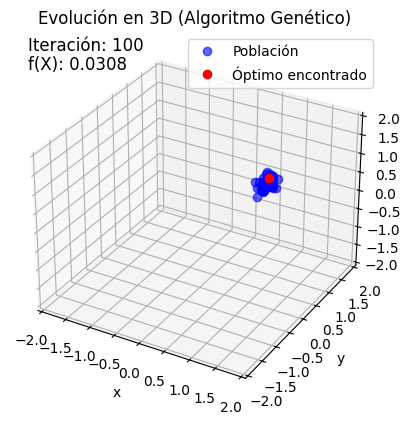

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
np.random.seed(42)

# Función de Rosenbrock en 3D
def rosenbrock_3d(x):
    a = 1
    b = 100
    return sum((a - x[:-1])**2 + b * (x[1:] - x[:-1]**2)**2)

# Algoritmo genético para 3 variables
def genetic_algorithm(func, dimension, population_size=50, generations=100, mutation_rate=0.1):
    population = np.random.uniform(-2, 2, (population_size, dimension))
    history = [population]

    for _ in range(generations):
        # Evaluar aptitud (fitness)
        fitness = np.array([func(ind) for ind in population])
        sorted_indices = np.argsort(fitness)
        population = population[sorted_indices]

        # Selección (elitismo + torneo)
        elite = population[:5]
        parents = population[:population_size // 2]

        # Cruce (recombinación)
        offspring = []
        for _ in range(population_size - len(elite)):
            p1, p2 = parents[np.random.randint(0, len(parents), 2)]
            crossover_point = np.random.randint(1, dimension)
            child = np.concatenate((p1[:crossover_point], p2[crossover_point:]))
            offspring.append(child)
        offspring = np.array(offspring)

        # Mutación
        mutation = np.random.uniform(-1, 1, offspring.shape) * mutation_rate
        offspring += mutation

        # Actualizar población
        population = np.vstack((elite, offspring))
        history.append(population)

    return history

# Ejecutar el algoritmo genético
puntos_iteracion = genetic_algorithm(rosenbrock_3d, 3, population_size=50, generations=100)

# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Evolución en 3D (Algoritmo Genético)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Configurar límites del espacio de búsqueda
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

# Inicialización de los puntos
puntos, = ax.plot([], [], [], 'bo', label="Población", alpha=0.6)
punto_optimizado, = ax.plot([], [], [], 'ro', label="Óptimo encontrado")
iteracion_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes, fontsize=12, color='black')
valor_text = ax.text2D(0.05, 0.90, "", transform=ax.transAxes, fontsize=12, color='black')

ax.legend()

# Animación
def animate(i):
    poblacion = puntos_iteracion[i]
    puntos.set_data(poblacion[:, 0], poblacion[:, 1])
    puntos.set_3d_properties(poblacion[:, 2])

    # Mostrar la iteración y el valor de la función en ese momento
    iteracion_text.set_text(f"Iteración: {i}")
    mejor_individuo = min(poblacion, key=rosenbrock_3d)
    valor_text.set_text(f"f(X): {rosenbrock_3d(mejor_individuo):.4f}")

    if i == len(puntos_iteracion) - 1:
        mejor = min(poblacion, key=rosenbrock_3d)
        punto_optimizado.set_data(mejor[0], mejor[1])
        punto_optimizado.set_3d_properties(mejor[2])

    return puntos, punto_optimizado, iteracion_text, valor_text

ani = FuncAnimation(fig, animate, frames=len(puntos_iteracion), interval=100, blit=True, repeat=True)
ani.save("evolucion_3d_genetico_con_textos.gif", writer=PillowWriter(fps=20))

plt.show()


In [ ]:
# Obtener la última población generada
ultima_poblacion = puntos_iteracion[-1]

# Encontrar el mejor individuo (mínimo de la función)
mejor_individuo = min(ultima_poblacion, key=rosenbrock_3d)

# Calcular el valor de la función en ese individuo
valor_optimo = rosenbrock_3d(mejor_individuo)

# Imprimir el valor de X y f(X) óptimo
print(f"El punto óptimo encontrado es: X = {mejor_individuo}")
print(f"El valor de la función en el óptimo es: f(X) = {valor_optimo}")

El punto óptimo encontrado es: X = [0.91890016 0.84455243 0.71404905]
El valor de la función en el óptimo es: f(X) = 0.030805069276073287


## Optimización por Enjambre de Partículas

In [ ]:
# Algoritmo PSO
def pso(func, dim, population_size=30, generations=200, w=0.5, c1=1.5, c2=1.5):
    # Inicialización
    positions = np.random.uniform(-5, 5, (population_size, dim))
    velocities = np.random.uniform(-1, 1, (population_size, dim))
    personal_best_positions = np.copy(positions)
    personal_best_scores = np.array([func(p) for p in positions])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]

    history = [global_best_position]

    # Iteraciones
    for _ in range(generations):
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            velocities[i] = (
                w * velocities[i]
                + c1 * r1 * (personal_best_positions[i] - positions[i])
                + c2 * r2 * (global_best_position - positions[i])
            )
            positions[i] += velocities[i]
            score = func(positions[i])

            # Actualizar mejores posiciones personales y globales
            if score < personal_best_scores[i]:
                personal_best_scores[i] = score
                personal_best_positions[i] = positions[i]

        # Actualizar el mejor global
        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        history.append(global_best_position)

    return history

### Función en 2 dimensiones

Mejor posición encontrada: [1.00000005 1.00000002]
Valor de la función objetivo: 2.2737746057730575e-15


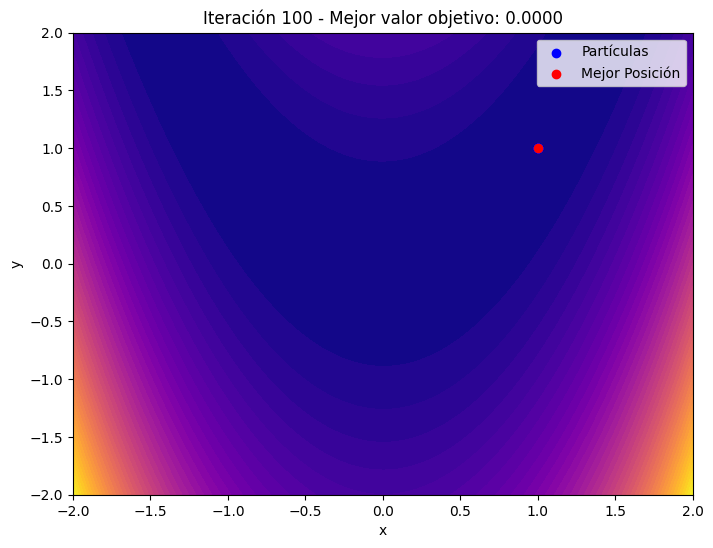

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
np.random.seed(42)
# Definir la función de Rosenbrock
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Definir los límites de búsqueda
lb = [-2] * 2  # Límites inferiores para 2D
ub = [2] * 2   # Límites superiores para 2D

# Número de partículas y número máximo de iteraciones
n_particles = 50
n_iterations = 100

# Inicializar las posiciones y velocidades de las partículas
positions = np.random.uniform(lb, ub, (n_particles, 2))  # Posiciones iniciales de las partículas
velocities = np.random.uniform(-0.5, 0.5, (n_particles, 2))  # Velocidades iniciales de las partículas

# Crear el gráfico de la función de Rosenbrock
x = np.linspace(lb[0], ub[0], 400)
y = np.linspace(lb[1], ub[1], 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Función para actualizar el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(X, Y, Z, levels=50, cmap="plasma")  # Contorno de la función
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_title("Optimización PSO - Evolución de Partículas")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Almacenar las posiciones de las partículas durante las iteraciones
particle_positions = []

# Inicializar elementos del gráfico
particles_scatter = ax.scatter([], [], color='blue', label="Partículas")
best_scatter = ax.scatter([], [], color='red', label="Mejor Posición")
ax.legend()

# Función para actualizar los cuadros de la animación
def update_frame(i):
    global positions, velocities
    ax.set_title(f"Iteración {i+1} - Optimización PSO")

    # Evaluar la función de Rosenbrock para todas las partículas
    fitness_values = np.apply_along_axis(rosenbrock, 1, positions)

    # Encontrar el mejor valor y la mejor posición
    best_pos = positions[np.argmin(fitness_values)]
    best_value = np.min(fitness_values)

    # Actualizar el gráfico
    particles_scatter.set_offsets(positions)
    best_scatter.set_offsets([best_pos])

    # Actualizar texto en la gráfica
    ax.set_title(f"Iteración {i+1} - Mejor valor objetivo: {best_value:.4f}")

    # Actualizar las partículas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 2)
    r2 = np.random.rand(n_particles, 2)

    # Actualización de las velocidades
    velocities[:] = (
        w * velocities
        + c1 * r1 * (best_pos - positions)
        + c2 * r2 * (best_pos - positions)
    )

    # Actualización de las posiciones
    positions[:] = positions + velocities

    # Almacenar las posiciones para la animación
    particle_positions.append(positions.copy())

    # En la última iteración, imprimir resultados
    if i == n_iterations - 1:
        print("Mejor posición encontrada:", best_pos)
        print("Valor de la función objetivo:", best_value)

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200, repeat=False)

# Guardar la animación como un archivo GIF
ani.save('pso_rosenbrock_2d.gif', writer='pillow', fps=5)

plt.show()


Función en 3 dimensiones

Mejor posición encontrada: [0.99998526 0.99996815 0.99994188]
Valor de la función objetivo: 5.692284283128508e-09


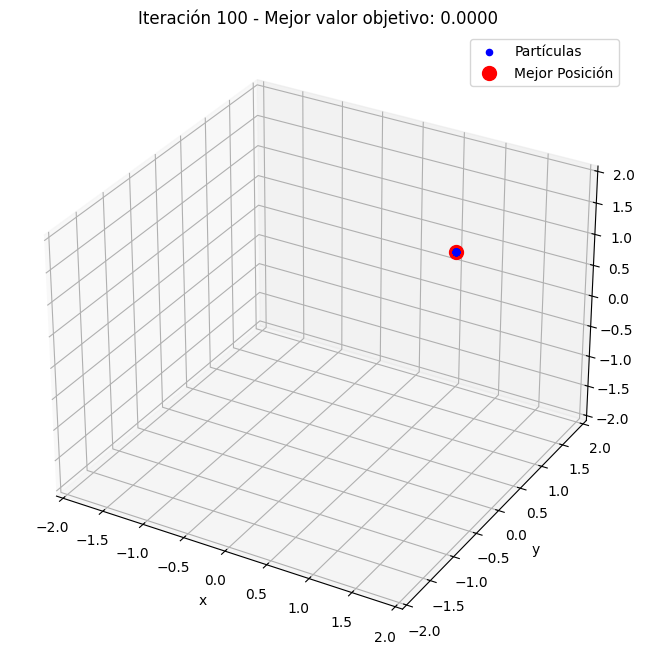

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
np.random.seed(42)

# Definir la función de Rosenbrock
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + (a - x[2])**2 + b * (x[2] - x[1]**2)**2

# Definir los límites de búsqueda
lb = [-2] * 3  # Límites inferiores para 3D
ub = [2] * 3   # Límites superiores para 3D

# Número de partículas y número máximo de iteraciones
n_particles = 50
n_iterations = 100

# Inicializar las posiciones y velocidades de las partículas
positions = np.random.uniform(lb, ub, (n_particles, 3))  # Posiciones iniciales de las partículas
velocities = np.random.uniform(-0.5, 0.5, (n_particles, 3))  # Velocidades iniciales de las partículas

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
ax.set_zlim(lb[2], ub[2])
ax.set_title("Optimización PSO - Evolución de Partículas (3D)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Inicializar elementos del gráfico
particles_scatter = ax.scatter([], [], [], color='blue', label="Partículas")
best_scatter = ax.scatter([], [], [], color='red', label="Mejor Posición")
ax.legend()

# Almacenar las posiciones de las partículas durante las iteraciones
particle_positions = []

# Función para actualizar los cuadros de la animación
def update_frame(i):
    global positions, velocities
    ax.clear()
    ax.set_xlim(lb[0], ub[0])
    ax.set_ylim(lb[1], ub[1])
    ax.set_zlim(lb[2], ub[2])
    ax.set_title(f"Iteración {i+1} - Optimización PSO")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    # Evaluar la función de Rosenbrock para todas las partículas
    fitness_values = np.apply_along_axis(rosenbrock, 1, positions)

    # Encontrar el mejor valor y la mejor posición
    best_pos = positions[np.argmin(fitness_values)]
    best_value = np.min(fitness_values)

    # Actualizar el gráfico
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='blue', label="Partículas")
    ax.scatter(best_pos[0], best_pos[1], best_pos[2], color='red', s=100, label="Mejor Posición")
    ax.legend()

    # Mostrar el mejor valor en el título
    ax.set_title(f"Iteración {i+1} - Mejor valor objetivo: {best_value:.4f}")

    # Actualizar las partículas (algoritmo PSO)
    w = 0.5  # Factor de inercia
    c1 = 1.5  # Coeficiente cognitivo
    c2 = 1.5  # Coeficiente social

    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Actualización de las velocidades
    velocities[:] = (
        w * velocities
        + c1 * r1 * (best_pos - positions)
        + c2 * r2 * (best_pos - positions)
    )

    # Actualización de las posiciones
    positions[:] = positions + velocities

    # Almacenar las posiciones para la animación
    particle_positions.append(positions.copy())

    # En la última iteración, imprimir resultados
    if i == n_iterations - 1:
        print("Mejor posición encontrada:", best_pos)
        print("Valor de la función objetivo:", best_value)

# Crear la animación
ani = animation.FuncAnimation(fig, update_frame, frames=n_iterations, interval=200, repeat=False)

# Guardar la animación como un archivo GIF
ani.save('pso_rosenbrock_3d.gif', writer='pillow', fps=5)

plt.show()


## Optimización por Evolución Diferencial

In [ ]:
# Implementación de Evolución Diferencial
def differential_evolution(func, dim, population_size=30, generations=100, F=0.8, CR=0.7):
    # Inicialización aleatoria de la población
    population = np.random.uniform(-2, 2, (population_size, dim))
    fitness = np.array([func(ind) for ind in population])
    history = [population.copy()]

    for _ in range(generations):
        new_population = population.copy()
        for i in range(population_size):
            # Selección de tres individuos aleatorios distintos
            indices = np.random.choice(np.delete(np.arange(population_size), i), 3, replace=False)
            x1, x2, x3 = population[indices]

            # Mutación: Generar vector mutante
            mutant = x1 + F * (x2 - x3)

            # Recombinar: Cruzar con el individuo actual
            trial = np.copy(population[i])
            crossover = np.random.rand(dim) < CR
            trial[crossover] = mutant[crossover]

            # Selección: Reemplazar si mejora el fitness
            trial_fitness = func(trial)
            if trial_fitness < fitness[i]:
                new_population[i] = trial
                fitness[i] = trial_fitness

        population = new_population
        history.append(population.copy())

    best_idx = np.argmin(fitness)
    best_solution = population[best_idx]
    return best_solution, history

### Función en 2 dimensiones

IndexError: list index out of range

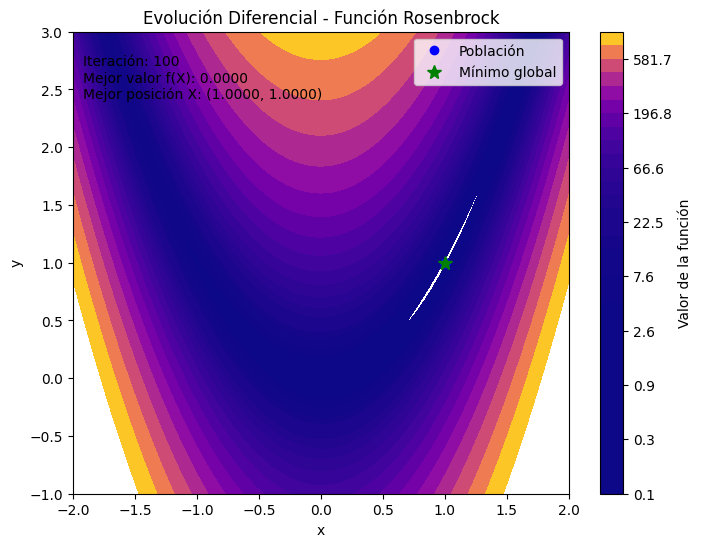

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Función de Rosenbrock en 2D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Implementación de Evolución Diferencial
def differential_evolution(func, bounds, population_size, generations, F=0.8, CR=0.9):
    dim = len(bounds)
    population = np.random.uniform(
        [b[0] for b in bounds], [b[1] for b in bounds], (population_size, dim)
    )
    history = [population.copy()]  # Almacenar las poblaciones en cada iteración
    best_positions = []  # Almacenar el mejor punto de cada iteración

    # Inicializar con el mejor punto de la población inicial
    best_pos = population[np.argmin([func(ind) for ind in population])]

    for gen in range(generations):
        new_population = []
        for i in range(population_size):
            # Selección de tres vectores aleatorios distintos a i
            indices = list(range(population_size))
            indices.remove(i)
            a, b, c = population[np.random.choice(indices, 3, replace=False)]

            # Mutación
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])  # Restringir a los límites

            # Cruce
            trial = np.where(np.random.rand(dim) < CR, mutant, population[i])

            # Selección
            if func(trial) < func(population[i]):
                new_population.append(trial)
            else:
                new_population.append(population[i])

        population = np.array(new_population)
        history.append(population.copy())  # Guardar la población actual

        # Actualizar el mejor punto si se encuentra uno nuevo
        current_best = population[np.argmin([func(ind) for ind in population])]
        if func(current_best) < func(best_pos):
            best_pos = current_best
        best_positions.append(best_pos.copy())  # Registrar el mejor punto en cada iteración

    return history, best_positions

# Configuración del algoritmo y límites
bounds = [(-2, 2), (-1, 3)]  # Límites para x e y
population_size = 50
generations = 100

# Ejecutar Evolución Diferencial
history, best_positions = differential_evolution(rosenbrock, bounds, population_size, generations)

# Crear una malla para la visualización de la función
x = np.linspace(bounds[0][0], bounds[0][1], 400)
y = np.linspace(bounds[1][0], bounds[1][1], 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

# Configuración de la animación
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=np.logspace(-1, 3, 35), cmap='plasma')
plt.colorbar(contour, label='Valor de la función')
poblacion_puntos, = ax.plot([], [], 'bo', label="Población")
punto_optimo_global, = ax.plot(1, 1, 'g*', markersize=10, label="Mínimo global")
ax.legend()
ax.set_title("Evolución Diferencial - Función Rosenbrock")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Texto dinámico para mostrar información
info_text = ax.text(
    0.02, 0.95, "", transform=ax.transAxes, fontsize=10, verticalalignment="top"
)

# Función para actualizar cada cuadro
def animate(i):
    poblacion = history[i]
    poblacion_puntos.set_data(poblacion[:, 0], poblacion[:, 1])
    best_pos = best_positions[i]
    best_value = rosenbrock(best_pos)

    info_text.set_text(
        f"Iteración: {i+1}\n"
        f"Mejor valor f(X): {best_value:.4f}\n"
        f"Mejor posición X: ({best_pos[0]:.4f}, {best_pos[1]:.4f})"
    )
    return poblacion_puntos, info_text

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(history), interval=100, blit=True)

# Guardar la animación como un archivo GIF
ani.save("differential_evolution_rosenbrock_2d_with_info.gif", writer=PillowWriter(fps=20))

plt.show()


### Función en 3 dimensiones

IndexError: list index out of range

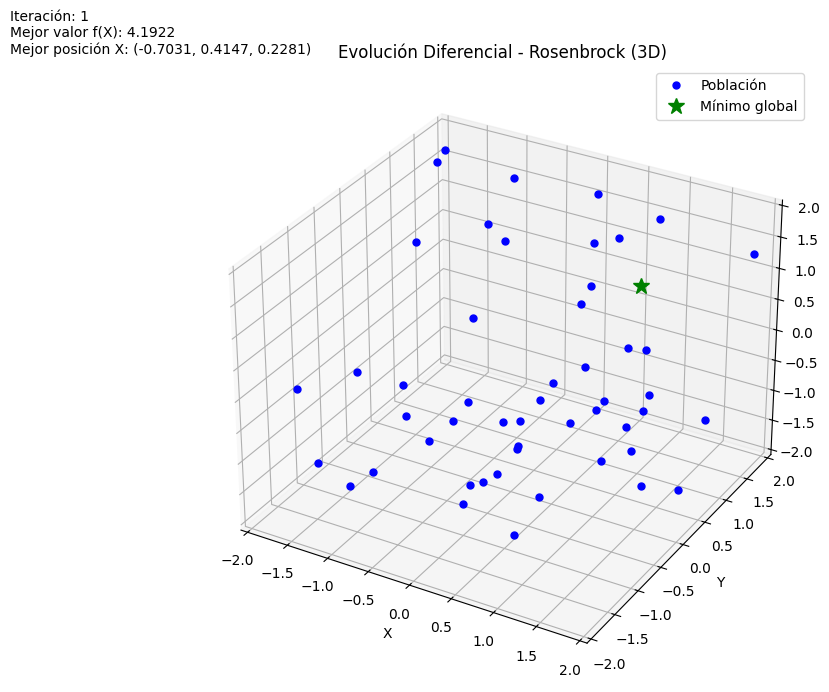

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Función de Rosenbrock en 3D
def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2 + (a - x[1])**2 + b * (x[2] - x[1]**2)**2

# Implementación de Evolución Diferencial
def differential_evolution(func, bounds, population_size, generations, F=0.8, CR=0.9):
    dim = len(bounds)
    population = np.random.uniform(
        [b[0] for b in bounds], [b[1] for b in bounds], (population_size, dim)
    )
    history = [population.copy()]  # Almacenar las poblaciones en cada iteración
    best_positions = []  # Almacenar el mejor punto de cada iteración

    # Inicializar con el mejor punto de la población inicial
    best_pos = population[np.argmin([func(ind) for ind in population])]

    for gen in range(generations):
        new_population = []
        for i in range(population_size):
            # Selección de tres vectores aleatorios distintos a i
            indices = list(range(population_size))
            indices.remove(i)
            a, b, c = population[np.random.choice(indices, 3, replace=False)]

            # Mutación
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])  # Restringir a los límites

            # Cruce
            trial = np.where(np.random.rand(dim) < CR, mutant, population[i])

            # Selección
            if func(trial) < func(population[i]):
                new_population.append(trial)
            else:
                new_population.append(population[i])

        population = np.array(new_population)
        history.append(population.copy())  # Guardar la población actual

        # Actualizar el mejor punto si se encuentra uno nuevo
        current_best = population[np.argmin([func(ind) for ind in population])]
        if func(current_best) < func(best_pos):
            best_pos = current_best
        best_positions.append(best_pos.copy())  # Registrar el mejor punto en cada iteración

    return history, best_positions

# Configuración del algoritmo y límites
bounds = [(-2, 2), (-2, 2), (-2, 2)]  # Límites para x, y, z
population_size = 50
generations = 100

# Ejecutar Evolución Diferencial
history, best_positions = differential_evolution(rosenbrock, bounds, population_size, generations)

# Configuración de la animación
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim(bounds[0][0], bounds[0][1])
ax.set_ylim(bounds[1][0], bounds[1][1])
ax.set_zlim(bounds[2][0], bounds[2][1])
ax.set_title("Evolución Diferencial - Rosenbrock (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
poblacion_puntos, = ax.plot([], [], [], 'bo', label="Población", markersize=5)
punto_optimo_global, = ax.plot([], [], [], 'g*', markersize=12, label="Mínimo global")
ax.legend()

# Texto dinámico para mostrar información
info_text = plt.figtext(
    0.02, 0.95, "", fontsize=10, verticalalignment="top"
)

# Función para actualizar cada cuadro
def animate(i):
    poblacion = history[i]
    poblacion_puntos.set_data(poblacion[:, 0], poblacion[:, 1])
    poblacion_puntos.set_3d_properties(poblacion[:, 2])
    best_pos = best_positions[i]
    best_value = rosenbrock(best_pos)

    info_text.set_text(
        f"Iteración: {i+1}\n"
        f"Mejor valor f(X): {best_value:.4f}\n"
        f"Mejor posición X: ({best_pos[0]:.4f}, {best_pos[1]:.4f}, {best_pos[2]:.4f})"
    )
    punto_optimo_global.set_data([1], [1])
    punto_optimo_global.set_3d_properties([1])
    return poblacion_puntos, punto_optimo_global, info_text

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(history), interval=100, blit=False)

# Guardar la animación como un archivo GIF
ani.save("differential_evolution_rosenbrock_3d_with_info.gif", writer=PillowWriter(fps=20))

plt.show()


In [ ]:
import numpy as np
np.all([5,1]<=np.array([6,4]))



True